In [35]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [36]:
#leitura do dataset
df = pd.read_csv("orders.csv",sep=";")
df

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_created_month,order_created_year,order_moment_created,order_moment_accepted,order_moment_ready,order_moment_collected,order_moment_in_expedition,order_moment_delivering,order_moment_delivered,order_moment_finished
0,68405119,3512,5,68405119,68405119,CANCELED,62.70,0.0,NaN,0,...,1,2021,01/01/2021 00:01:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68405123,3512,5,68405123,68405123,CANCELED,62.70,0.0,NaN,0,...,1,2021,01/01/2021 00:04:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68405206,3512,5,68405206,68405206,CANCELED,115.50,0.0,NaN,0,...,1,2021,01/01/2021 00:13:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68405465,3401,5,68405465,68405465,CANCELED,55.90,0.0,NaN,0,...,1,2021,01/01/2021 00:19:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68406064,3401,5,68406064,68406064,CANCELED,37.90,0.0,NaN,0,...,1,2021,01/01/2021 00:26:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012680,51279246,1107,5,51279246,51279246,CANCELED,206.50,9.9,0.0,23,...,12,2021,31/12/2021 23:44:52,31/12/2021 23:45:25,NaN,NaN,NaN,NaN,NaN,NaN
1012681,51279247,1107,5,51279247,51279247,CANCELED,181.00,9.9,0.0,23,...,12,2021,31/12/2021 23:46:45,31/12/2021 23:47:24,NaN,NaN,NaN,NaN,NaN,NaN
1012682,51279248,525,31,51279248,51279248,CANCELED,2.00,0.0,0.0,23,...,12,2021,31/12/2021 23:55:34,31/12/2021 23:55:41,31/12/2021 23:56:14,NaN,NaN,NaN,NaN,NaN
1012683,51279249,2700,5,51279249,51279249,CANCELED,126.06,7.0,0.0,23,...,12,2021,31/12/2021 23:56:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Número de linhas e colunas:
df.shape

(1012685, 22)

In [38]:
#identificando quantidade de NULL
df.isnull().sum()

order_id                           0
store_id                           0
channel_id                         0
payment_order_id                   0
delivery_order_id                  0
order_status                       0
order_amount                       0
order_delivery_fee                 0
order_delivery_cost            16995
order_created_hour                 0
order_created_minute               0
order_created_day                  0
order_created_month                0
order_created_year                 0
order_moment_created               0
order_moment_accepted          23470
order_moment_ready             49729
order_moment_collected        115414
order_moment_in_expedition    180581
order_moment_delivering        66872
order_moment_delivered        957904
order_moment_finished          42489
dtype: int64

In [39]:
#deletando colunas com mais de 20 mil valores NULL
df = df.dropna(axis=1, thresh=992685)

#deletando linhas com valores NULL
df = df.dropna(axis=0)


In [40]:

#deletando colunas que não serão usadas
df = df.drop(columns=["order_id","store_id","channel_id","payment_order_id","delivery_order_id","order_created_hour","order_status","order_created_minute","order_created_year","order_created_day","order_created_month"])

In [44]:
#tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995690 entries, 7 to 1012684
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_amount          995690 non-null  float64       
 1   order_delivery_fee    995690 non-null  float64       
 2   order_delivery_cost   995690 non-null  float64       
 3   order_created_month   995690 non-null  int64         
 4   order_moment_created  995690 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 45.6 MB


In [42]:
#estatística descritiva:
df.describe()

,order_amount,order_delivery_fee,order_delivery_cost,order_created_month
count,995690.000000,995690.000000,995690.000000,995690.000000
mean,99.225364,6.222270,7.303804,6.324947
std,201.680418,6.199489,3.963485,3.360407
min,0.000000,0.000000,0.000000,1.000000
25%,39.800000,0.000000,5.250000,3.000000
50%,69.900000,6.900000,7.250000,6.000000
75%,119.800000,11.900000,8.750000,9.000000
max,100000.110000,990.110000,156.000000,12.000000


In [43]:
#transformando a coluna  order_moment_created para data
df["order_moment_created"] = pd.to_datetime(df["order_moment_created"], format = "%d/%m/%Y %H:%M:%S")
df["order_moment_created"] = df["order_moment_created"].dt.date
df['order_moment_created'] = pd.to_datetime(df.order_moment_created, infer_datetime_format=True) 


In [45]:
#criando coluna com valor de receita
df["order_revenue"] = df["order_amount"]-(df["order_delivery_fee"]+df["order_delivery_cost"])

In [46]:
#deletando linhas com order_revenue negativo
df.drop(df[ df['order_revenue'] < 0].index , inplace=True)

In [47]:
#identificando os outliers na coluna order_revenue
q1 = df.order_revenue.quantile(.25)
q3 = df.order_revenue.quantile(.75)
IQR= q3 - q1

sup = q3 + 1.5*IQR
inf = q1 - 1.5*IQR
print("IQR variável é: ", IQR)
print("O limite superior é: ",sup)
print("O limite inferior é: ",inf)

print("O dataset tem {} colunas,".format(df.shape[0]))
print("e {} estão acima de 217.5,".format(len(df[df.order_revenue > 217.5])))
print("Isso representa {:.2f}% do dataset.\n".format((len(df[df.order_revenue > 217.5]) / df.shape[0])*100))

IQR variável é:  75.28
O limite superior é:  217.5
O limite inferior é:  -83.62
O dataset tem 987832 colunas,
e 55798 estão acima de 217.5,
Isso representa 5.65% do dataset.



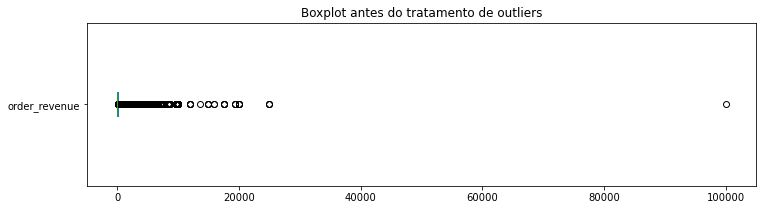

<Figure size 432x288 with 0 Axes>

In [48]:
# Plot the boxplot para melhor visualizar outliers
fig, ax = plt.subplots(figsize = (12,3))
df.order_revenue.plot(kind = 'box', vert = False)
ax.set_title("Boxplot antes do tratamento de outliers")
plt.show()
plt.tight_layout()

In [49]:
#tratamento de outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.order_revenue > 217.5].index,axis =0, inplace = True)

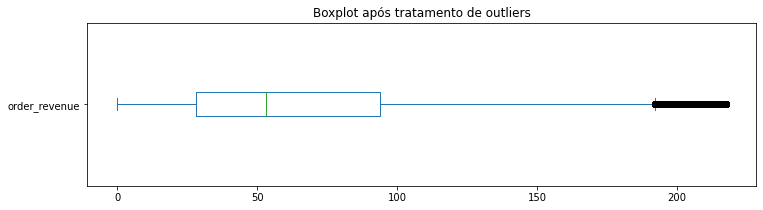

<Figure size 432x288 with 0 Axes>

In [50]:
# Plot the boxplot
fig, ax = plt.subplots(figsize = (12,3))
df_clean.order_revenue.plot(kind = 'box', vert = False)
ax.set_title("Boxplot após tratamento de outliers")
plt.show()
plt.tight_layout()

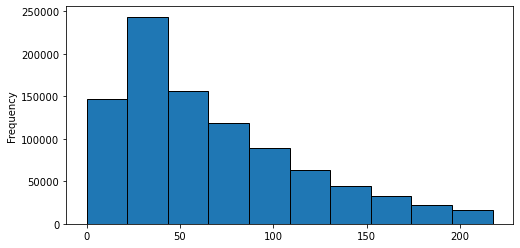

In [51]:
#gráfico histograma para entender a frequência do valor de faturamento
plt.figure(figsize =(8,4))
df_clean["order_revenue"].plot.hist(edgecolor='black');

<Figure size 1080x576 with 0 Axes>

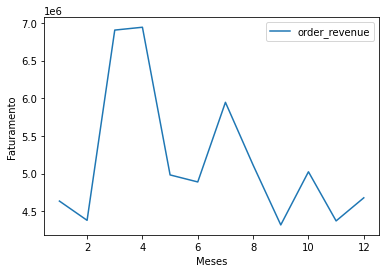

In [85]:
#gráfico de linhas do faturamento por mês
df_mes = df_clean.groupby([df['order_moment_created'].dt.month]).sum()
df_mes = df_mes.reset_index(drop=False)
plt.figure(figsize =(15,8))
df_mes.plot("order_moment_created","order_revenue", xlabel = 'Meses', ylabel = 'Faturamento');


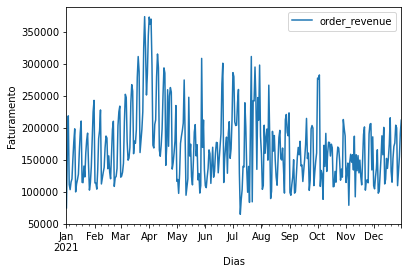

In [77]:
#gráfico de linhas do faturamento por dia
df_dia = df_clean.groupby(['order_moment_created']).sum()
df_dia = df_dia.reset_index(drop=False)
df_dia.plot("order_moment_created","order_revenue", xlabel = 'Dias', ylabel = 'Faturamento');


Previsão de Séries Temporais com o Prophet 

In [28]:
df_clean['order_moment_created'] = pd.to_datetime(df_clean.order_moment_created, infer_datetime_format=True) 



In [86]:
df_mes

,order_moment_created,order_amount,order_delivery_fee,order_delivery_cost,order_created_month,order_revenue
0,1,5665872.66,486567.54,545212.54,70458,4634092.58
1,2,5356837.29,452614.83,526062.02,137166,4378160.44
2,3,8178588.90,574383.50,698038.39,303480,6906167.01
3,4,8188247.24,582475.17,661894.25,390244,6943877.82
4,5,6026911.71,482900.76,562485.52,388498,4981525.43
5,6,5910028.24,473081.78,548725.77,448164,4888220.69
6,7,7022550.40,491568.51,584649.96,597135,5946331.93
7,8,6155433.08,477884.26,564819.36,616056,5112729.46
8,9,5223859.00,418189.64,488418.30,596232,4317251.06
9,10,6001991.39,443746.00,534827.74,748580,5023417.65
